# Social Golfer


You have "num_golfers" golfers who need to be scheduled into "num_groups" foursomes (you can assume num_golfer/4 = num_groups), over "num_rounds" days.  Write an IP to find a schedule where:

 - Each golfer plays once each round.
 - Each foursome is assigned 4 golfers
 - No golfer ever plays with another golfer more than once.  
 

Return the schedule as a dictionary with a key (length 2 tuple) for each group-day pair (index the groups 1,..., num_groups and the days 1,..., num_rounds), whose value is a length four list with the golfers (indexed 1,..., num_golfers) assigned this group-day pair.

So, if  num_golfers =16  and num_groups=num_rounds=4, the dictionary you return should look like

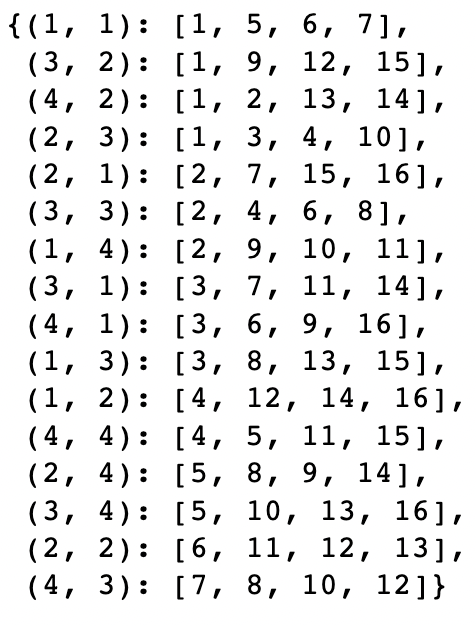

In [96]:
from gurobipy import *

In [109]:
def Social_Golfer_IP(num_golfers, num_groups, num_rounds):

    m = Model()
    x = {}
    z = {}
    
    for i in range(num_golfers):
        for g in range(num_groups):
            for r in range(num_rounds):
                x[(i,g,r)] = m.addVar(0,1,0,GRB.BINARY)
                
    for i in range(num_golfers): 
        for j in range(num_golfers):
            for r in range(num_rounds):
                if i != j:
                    z[(i,j,r)] = m.addVar(0,1,0,GRB.BINARY)
                    
    for i in range(num_golfers):
        for r in range(num_rounds):
            m.addConstr(quicksum(x[(i,g,r)] for g in range(num_groups)) == 1)
            
    for g in range(num_groups):
        for r in range(num_rounds):
            m.addConstr(quicksum(x[(i,g,r)] for i in range(num_golfers)) == 4)

                
    for i in range(num_golfers):
        for j in range (num_golfers):
            if i != j:
                m.addConstr(quicksum(z[(i,j,r)] for r in range(num_rounds)) <= 1)
                
    for i in range(num_golfers):
        for j in range(num_golfers):
            for g in range(num_groups):
                for r in range(num_rounds):
                    if i != j:
                        m.addConstr(x[(i,g,r)] + x[(j,g,r)] <= 1 + z[i,j,r])
    
    m.setParam("OutputFlag", False)
    m.optimize()
    
    schedule = {}
    for g in range(num_groups):
        for r in range(num_rounds):
            foursome = [i+1 for i in range(num_golfers) if x[(i,g,r)].x == 1]
            schedule[(g+1,r+1)] = foursome
    print(schedule)

    return schedule
    

In [113]:
def Check_Sol(schedule, num_golfers, num_groups, num_rounds):
    
    all_foursomes = max(len(schedule[p]) for p in schedule)
    if all_foursomes!=4:
        return False
    for g in range(1, num_golfers+1):
        played_with = []
        for p in schedule:
            if g in schedule[p]:
                other_players = [i for i in schedule[p] if i!=g]
                played_with.extend(other_players)
        
        if len(set(played_with))!=num_golfers-num_rounds:
            return False
    return True
    
    

In [114]:
num_golfers=4
num_groups = 1
num_rounds =1
schedule = Social_Golfer_IP(num_golfers, num_groups, num_rounds)
assert schedule == {(1,1):[1,2,3,4]}

{(1, 1): [1, 2, 3, 4]}


In [115]:
#This one might take a minute or so to run
num_golfers=20
num_groups = 5
num_rounds =5
schedule = Social_Golfer_IP(num_golfers, num_groups, num_rounds)
assert Check_Sol(schedule,num_golfers, num_groups, num_rounds)

{(1, 1): [1, 8, 11, 14], (1, 2): [1, 3, 4, 6], (1, 3): [1, 9, 13, 19], (1, 4): [1, 2, 7, 15], (1, 5): [1, 5, 10, 12], (2, 1): [2, 6, 12, 13], (2, 2): [2, 8, 9, 17], (2, 3): [11, 12, 17, 18], (2, 4): [4, 11, 13, 20], (2, 5): [7, 9, 11, 16], (3, 1): [3, 7, 18, 19], (3, 2): [7, 12, 14, 20], (3, 3): [4, 5, 7, 8], (3, 4): [8, 12, 16, 19], (3, 5): [2, 4, 14, 18], (4, 1): [4, 10, 16, 17], (4, 2): [5, 13, 16, 18], (4, 3): [2, 3, 10, 20], (4, 4): [6, 9, 10, 18], (4, 5): [3, 8, 13, 15], (5, 1): [5, 9, 15, 20], (5, 2): [10, 11, 15, 19], (5, 3): [6, 14, 15, 16], (5, 4): [3, 5, 14, 17], (5, 5): [6, 17, 19, 20]}
